In [1]:
import skimage #scikit-learn image manipulation #
from skimage import io
from skimage import data
import matplotlib.pyplot as plt #plot utilities #
import numpy as np #numerical computations #

ModuleNotFoundError: No module named 'skimage'

(-0.5, 450.5, 299.5, -0.5)

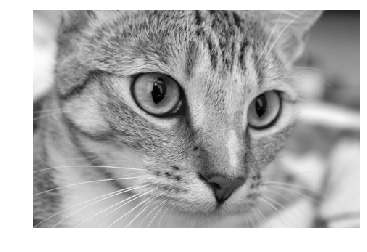

In [2]:
cat = data.chelsea()
catg = skimage.color.rgb2gray(cat) 

# Let's have a look at our image #
plt.imshow(catg,cmap='gray')
plt.axis('off')

In [3]:
Fc = np.fft.fft2(catg)

In [4]:
F_mag = np.abs(Fc)

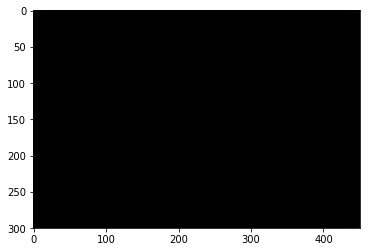

In [5]:
plt.imshow(F_mag,cmap='gray')

(-0.5, 450.5, 299.5, -0.5)

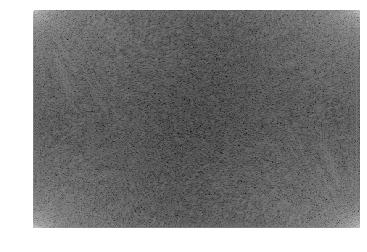

In [6]:
F_mag = 20*np.log10(np.abs(Fc))
plt.imshow(F_mag,cmap ='gray')
plt.axis('off')

(-0.5, 450.5, 299.5, -0.5)

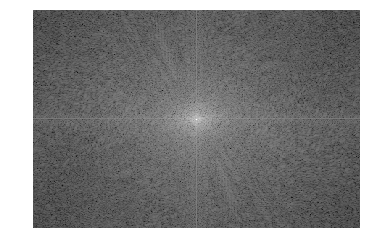

In [7]:
F_shift = np.fft.fftshift(Fc)
F_mag = 20*np.log10(np.abs(F_shift))
plt.imshow(F_mag,cmap ='gray')
plt.axis('off') 

(-0.5, 450.5, 299.5, -0.5)

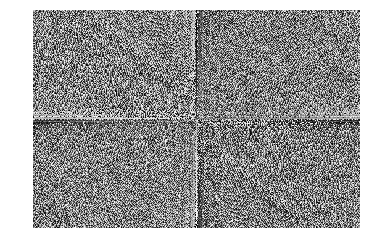

In [8]:
F_phase = np.arctan2(np.imag(F_shift),np.real(F_shift))
plt.imshow(F_phase,cmap ='gray')
plt.axis('off') 

In [10]:
I2 = catg[0:300,0:300]
F2 = np.fft.fft2(I2)
F2_mag = np.abs(F2)
F2_phase = np.arctan2(np.imag(F2),np.real(F2))

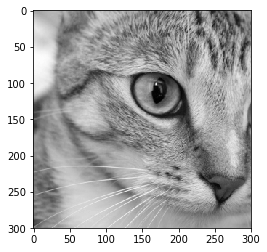

In [11]:
# Now use phasor form to get the combinded images back #
# Look at the coins mag with cat phase #
FIC2 = F2_mag*np.exp(1j*F2_phase) # mag of cat but phase of coins #
IC2 = np.real(np.fft.ifft2(FIC2)) # make sure we only have real data left #

plt.imshow(IC2,cmap='gray')

In [101]:
def convolv_2d_grayscale(image, kernel, mode='constant', boundary='0'):
    
    im_shape = np.shape(image)
    im_x = im_shape[0]
    im_y = im_shape[1]
    
    kernel = np.fliplr(np.flipud(kernel))
    kernel_shape = np.shape(kernel)
    k_x = int((kernel_shape[0] - 1) / 2)
    k_y = int((kernel_shape[1] - 1) / 2)
    new_image = np.copy(image)
    
    if mode == 'constant':
        image = np.lib.pad(image, (k_x, k_y), 'constant', constant_values=(boundary, boundary))
    elif mode == 'edge':
        image = np.lib.pad(image, (k_x, k_y), 'edge')
    
    for i in range(im_x):
        for j in range(im_y):
            new_image[i, j] = np.sum(image[i : i + 2*k_x + 1, j : j + 2*k_y + 1] * kernel)
    
    return new_image

In [102]:
def my_imfilter(image, kernel, mode='constant', boundary='0'):
    kernel_shape = np.shape(kernel)
    im_shape = np.shape(image)
    print(im_shape)
    k_x = kernel_shape[0] - 1
    k_y = kernel_shape[1] - 1
    print(kernel_shape)
    
    if len(kernel_shape) != 2 or k_x % 2 != 0 or k_y % 2 != 0:
        print("Please enter an odd-dimension kernel")
        return None
    
    if mode != 'constant' and mode != 'edge':
        print("Invalid mode")
        return None

    if len(im_shape) == 2:
        # Grayscale image
        print('grayscale image')
        image = convolv_2d_grayscale(image, kernel, mode, boundary)
    elif len(im_shape) == 3:
        # RGB image
        print('rgb image')
        for i in range(im_shape[2]):
            plt.imshow(image)
            plt.axis('off')
            image[:,:,i] = convolv_2d_grayscale(image[:,:,i], kernel, mode, boundary)
            plt.imshow(image)
            plt.axis('off')
    else:
        print('Image error')
        return None
    
    return image

(300, 451, 3)
(1, 1)
rgb image


(-0.5, 450.5, 299.5, -0.5)

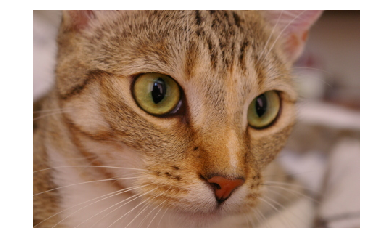

In [115]:
cat = data.chelsea()
plt.imshow(cat)#,cmap='gray')
plt.axis('off')
catg = skimage.color.rgb2gray(cat)
array = np.array([[[0, 0.5], [0.1, 0.4], [0.5, 0.6]], [[0, 0.9], [0.1, 0.4], [0.5, 0.6]], [[0, 0.25], [0.1, 0.4], [0.5, 0.6]]])
size = 1
kernel = np.full((size, size), 1.0 / size ** 2)
identity_kernel = np.full((size, size), 0)
identity_kernel[int(size / 2), int(size / 2)] = 1
sharpen_kernel = 2 * identity_kernel - kernel

filtered = my_imfilter(cat, sharpen_kernel, 'edge')
plt.imshow(filtered)#,cmap='gray')
plt.axis('off')

(-0.5, 450.5, 299.5, -0.5)

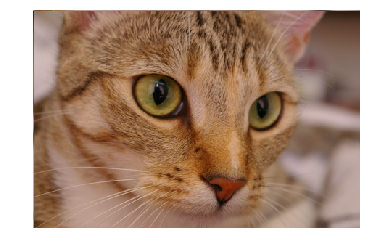

In [88]:
plt.imshow(cat)
plt.axis('off')